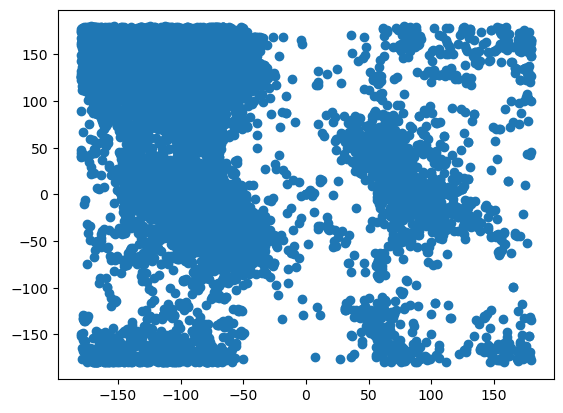

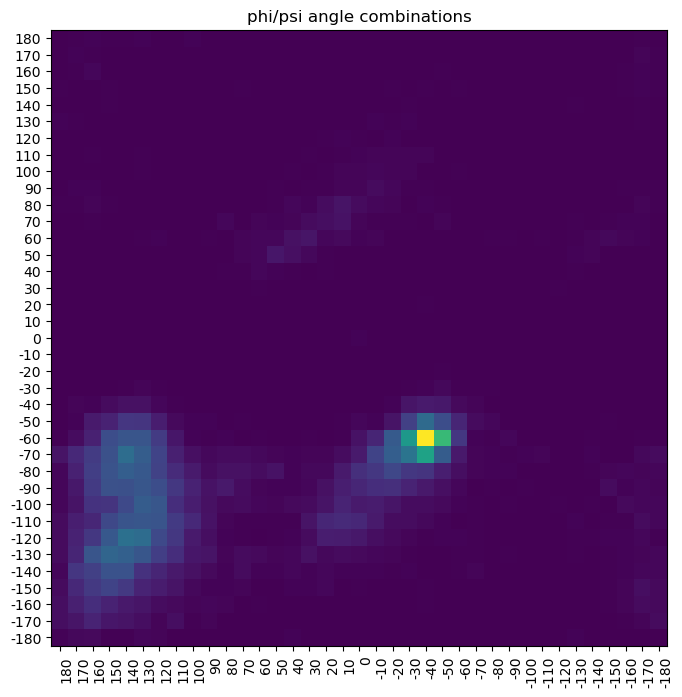

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

residues = pd.read_csv("./datasets/assignment3-data-1.csv")


# 1a
phi = residues['phi']
psi = residues['psi']

plt.scatter(phi,psi)
plt.show()


data = np.zeros((37,37))
# count the occurances of each angle combination in terms
# 180 : 170 : 160 : 150 ... 0 : -10 : -20....
for phiv,psiv in zip(phi.tolist(),psi.tolist()):
    
    # Notes:
    # Kalkylera en index genom att 180 grader är först, dvs index 0 osv osv
    # Om de är 0 så vill vi att den ligger i mitten, dvs index 18 för den i mitten
    # 180 grader blir 18 så den ligger först, 50 grader blir 5 så den ligger på 13de plats
    # sen -180 blir 18 så den ska ligga sist med 18 + 18 = 36
    phir = round(phiv/10) 
    psir = round(psiv/10)
   
    phi_index = 0
    if phir == 0:
        phi_index = 18
    elif phir > 0:
        phi_index = 18 - phir
    elif phir < 0:
        phi_index = 18 + abs(phir)
        
    psi_index = 0
    if psir == 0:
        psi_index = 18
    elif psir > 0:
        psi_index = 18 - psir
    elif psir < 0:
        psi_index = 18 + abs(psir)
    #print(phi_index, psi_index, phir, psir)
    data[phi_index,psi_index] = data[phi_index,psi_index] + 1
   


fig, ax = plt.subplots()
im = ax.imshow(data)
label = []
for i in range(37):
    label.append("" + str(180 - i*10))

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(label)), labels=label)
ax.set_yticks(np.arange(len(label)), labels=label)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")


ax.set_title("phi/psi angle combinations")
fig.set_size_inches(15, 8)
plt.show()
# snott från https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

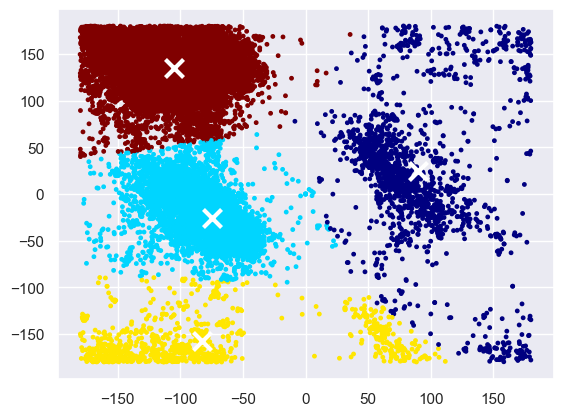

In [93]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

X = np.array(list(map(lambda x, y: [x, y], phi, psi)))
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
color = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color, s=6, cmap="jet_r")

#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10,)



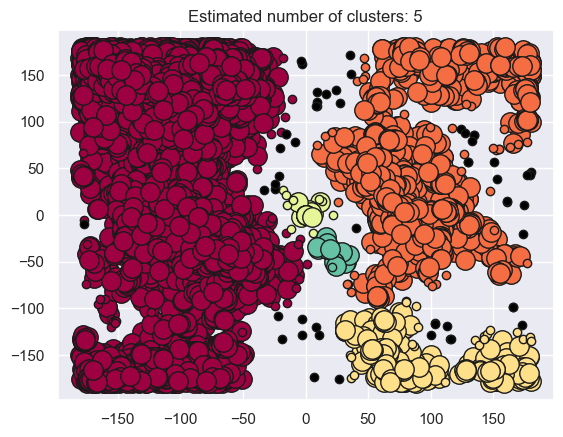

residue name  position chain         phi         psi  lable
1461           ASN       149     D   -2.688591 -128.899534     -1
2652           ALA        56     A   -2.863239 -111.508315     -1
3949           THR        38     G -177.161178   -9.990774     -1
4416           ARG       157     1  113.095338 -118.529799     -1
4931           ASN        65     4  152.463939   38.202112     -1
4994           GLY        45     A  134.198585   85.927527     -1
5045           GLY        96     A  165.282126  -98.857575     -1
5108           SER       159     A  -15.859789   86.926041     -1
5109           GLY       160     A  129.642357   56.523181     -1
5181           GLY       232     A  103.040445 -116.242548     -1
5211           GLU        18     B  150.725218   57.130753     -1
5238           GLY        45     B  134.186947   85.834515     -1
5289           GLY        96     B  165.344635  -98.745692     -1
5352           SER       159     B  -15.948838   86.965383     -1
5353           GLY       160     B  129.619165   56.490664     -1
5410           TYR       217     B    9.319468  120.713864     -1
5425           GLY       232     B  103.113390 -116.328113     -1
6661           TYR        76     F    9.226063  132.061817     -1
6830           GLY         1     G   10.971306 -128.616482     -1
7325           THR       155     1  -21.300098   42.115912     -1
8224           ARG         3     B   27.876134  119.562711     -1
8871           LYS        24     A   -8.510692   77.929014     -1
9106           LYS       126     A  124.021915   91.931559     -1
10332          TYR        22     A   36.499564  151.107420     -1
10598          TYR        22     A  -20.506791   72.242866     -1
10731          TYR        22     A    8.402246 -120.494961     -1
10835          LYS       126     A  127.305837   87.905882     -1
12186          GLY       515     B   -2.957472  161.446513     -1
13119          SER         4     B   24.670167  134.290762     -1
14899          GLY       150     H   99.989767 -128.507561     -1
14934          LYS       185     H  -18.971833 -132.962689     -1
15858          ASP       174     I  172.789014 -117.747636     -1
15859          ALA       179     I  174.665578   10.211788     -1
16028          LYS       348     I  173.265530  -20.840304     -1
16108          VAL         5     L   27.027384 -175.927330     -1
16136          GLU        42     L  -22.106750 -108.147906     -1
17598          GLU       208     B  132.806144   78.796791     -1
17599          ARG        36     C   -4.052540  165.025972     -1
18322          ASN       403     A  -24.168465   27.791901     -1
19164          ASN       403     C  -24.781403   32.865000     -1
20006          ASN       403     E  -32.883017   27.120384     -1
23951          SER       131     J  179.755958   46.009970     -1
24795          SER       131     L  177.962524   43.571336     -1
25217          SER       131     M  179.048762   42.701963     -1
26061          SER       131     O  176.417552   43.260732     -1
26710          ALA       171     B   40.118067  -14.349375     -1
26881          ALA       171     C    7.093271 -173.731739     -1
26888          GLY         7     D   16.412757  129.576068     -1
27164          ARG       134     A    9.239856  116.825337     -1
27297          ARG       134     B    7.999099  116.933094     -1
27473          ASP       303     C  160.971856   14.160380     -1
27487          ASN       317     C  114.930966 -132.592680     -1
27686          ASP       303     D  160.998759   14.674984     -1
27700          ASN       317     D  116.013577 -132.406466     -1
28261          ARG       187     A   35.559288  170.933075     -1

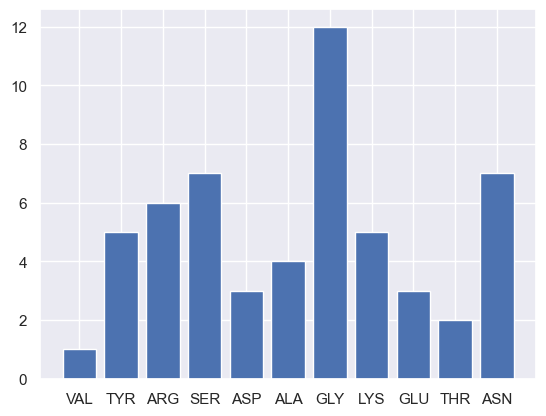

In [156]:
from sklearn.cluster import DBSCAN

# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
db = DBSCAN(eps=18, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=14,)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k", markersize=6,)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


residues["lable"] = labels
noise = residues[residues["lable"] < 0]
display(noise)

names = list(set(noise["residue name"]))
occurrences = np.zeros(len(set(noise["residue name"])))

for name in noise["residue name"]:
    occurrences[names.index(name)] += 1
    
plt.bar(names, occurrences)
plt.show()

